In [1]:
from random import randint
import matplotlib.pyplot as plt

In [2]:
class QuadNode:
    def __init__(self, x1, y1, x2, y2):
        self.x1, self.x2 = min(x1, x2), max(x1, x2)
        self.y1, self.y2 = min(y1, y2), max(y1, y2)
        self.children = {'NW': None, 'NE': None, 'SE': None, 'SW': None}
        self.point = None
        self.leaf = True

    def insert(self, x, y):
        if self.point is None and self.leaf:
            # quad is an empty leaf, change its value
            self.point = (x, y)
        else:
            q_key, q_bound = self.quarter(x, y)
            if self.children[q_key] is None:
                # split quad
                self.children[q_key] = QuadNode(*q_bound)
            # make it its child problem
            self.children[q_key].insert(x, y)

            if self.point is not None:
                # insert quads value if it was a leaf before
                q2_key, q2_bound = self.quarter(*self.point)
                if self.children[q2_key] is None:
                    self.children[q2_key] = QuadNode(*q2_bound)
                self.children[q2_key].insert(*self.point)
                self.point = None

            self.leaf = False

    def find_closest(self, x, y, min_dist=float('inf')):
        if self.leaf:
            if self.point is None:
                return None
            dist = ((x - self.point[0]) ** 2 + (y - self.point[1]) ** 2) ** 0.5
            if dist < min_dist:
                return self.point
        elif self.dist(x, y) >= min_dist:
            # check if all points in square are too far
            return None
        else:
            min_p = None
            children = filter(lambda q: q is not None, self.children.values())
            for v in sorted(children, key=lambda q: q.dist(x, y)):
                # this should speed up converging
                p = v.find_closest(x, y, min_dist)
                if p is not None:
                    # if p is not None then its distance is less than min_dist
                    min_dist = ((x - p[0]) ** 2 + (y - p[1]) ** 2) ** 0.5
                    min_p = p
            return min_p
        return None

    def quarter(self, x, y):
        if not (self.x1 <= x < self.x2 and self.y1 <= y < self.y2):
            raise Exception('Point outside quad boundaries')
        qx, qy = 2 * x < self.x1 + self.x2, 2 * y < self.y1 + self.y2
        if not qx and not qy:
            return 'NE', ((self.x1 + self.x2) / 2, (self.y1 + self.y2) / 2, self.x2, self.y2)
        if not qx and qy:
            return 'SE', ((self.x1 + self.x2) / 2, self.y1, self.x2, (self.y1 + self.y2) / 2)
        if qx and qy:
            return 'SW', (self.x1, self.y1, (self.x1 + self.x2) / 2, (self.y1 + self.y2) / 2)
        if qx and not qy:
            return 'NW', (self.x1, (self.y1 + self.y2) / 2, (self.x1 + self.x2) / 2, self.y2)

    def dist(self, x, y):
        if self.x1 <= x <= self.x2 and self.y1 <= y <= self.y2:
            # inside the square
            return 0
        if self.x1 <= x <= self.x2:
            # upper and bottom side
            return min(abs(self.y1 - y), abs(self.y2 - y))
        if self.x1 <= x <= self.x2:
            # left and right side
            return min(abs(self.x1 - x), abs(self.x2 - x))
        # distance to corners
        return min([((self.x1 - x) ** 2 + (self.y1 - y) ** 2) ** 0.5,
                    ((self.x1 - x) ** 2 + (self.y2 - y) ** 2) ** 0.5,
                    ((self.x2 - x) ** 2 + (self.y1 - y) ** 2) ** 0.5,
                    ((self.x2 - x) ** 2 + (self.y2 - y) ** 2) ** 0.5])

    def plot(self):
        plt.gca().add_patch(
            plt.Rectangle((self.x1, self.y1), self.x2 - self.x1, self.y2 - self.y1,
                          fill=False, edgecolor='orange', linewidth=2))
        for c in self.children.values():
            if isinstance(c, QuadNode):
                c.plot()

In [3]:
W, H = 32, 32
N = 25

root = QuadNode(0, 0, W, H)
points = list({(randint(0, W - 1) + 0.5, randint(0, H - 1) + 0.5) for i in range(N)})
for x, y in points:
    root.insert(x, y)
points

[(18.5, 19.5),
 (2.5, 8.5),
 (6.5, 26.5),
 (20.5, 22.5),
 (0.5, 4.5),
 (25.5, 24.5),
 (25.5, 30.5),
 (29.5, 21.5),
 (18.5, 30.5),
 (29.5, 27.5),
 (8.5, 4.5),
 (1.5, 4.5),
 (10.5, 10.5),
 (1.5, 25.5),
 (14.5, 1.5),
 (22.5, 5.5),
 (20.5, 20.5),
 (14.5, 10.5),
 (27.5, 13.5),
 (4.5, 30.5),
 (8.5, 18.5),
 (30.5, 27.5),
 (28.5, 27.5),
 (25.5, 16.5),
 (7.5, 7.5)]

In [4]:
query_point = (randint(0, W) + 0.5, randint(0, H) + 0.5)
closest_point = root.find_closest(*query_point)
query_point, closest_point

((1.5, 0.5), (1.5, 4.5))

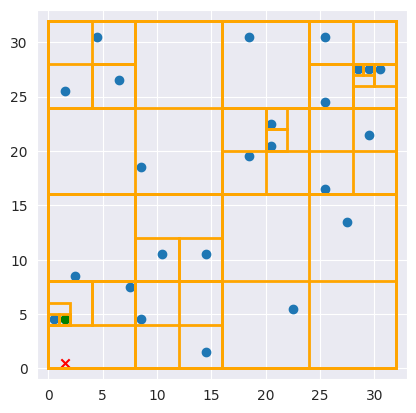

In [5]:
plt.gca().set_aspect('equal')

plt.xlim(-1, W + 1)
plt.ylim(-1, H + 1)
x, y = list(zip(*points))
plt.scatter(x, y)
plt.scatter([query_point[0]], [query_point[1]], c='r', marker='x')
plt.scatter([closest_point[0]], [closest_point[1]], c='g')
root.plot()